In [1]:
import os
from PIL import Image  # You'll need the Pillow library: pip install Pillow

In [3]:
def check(folder_path, max_images):
    count = 0
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.bmp'):  # Check for common image extensions
            img_path = os.path.join(folder_path, filename)
            try:
                with Image.open(img_path) as img:
                    width, height = img.size
                    print(f"{filename}: Width - {width}, Height - {height}")
                    count += 1
    
                    if count >= max_images:
                        break  # Stop after 10 images
    
            except OSError:
                print(f"Error processing image: {filename}")

In [4]:
check('/mnt/sxtn/aerial/change/CDD/Real/original/without_add_object', 10)


7_OUT.bmp: Width - 4725, Height - 2700
2_OUT.bmp: Width - 4725, Height - 2700
6_B.bmp: Width - 4725, Height - 2700
5_B.bmp: Width - 4725, Height - 2700
1_OUT.bmp: Width - 4725, Height - 2700
2_B.bmp: Width - 4725, Height - 2700
6_A.bmp: Width - 4725, Height - 2700
3_A.bmp: Width - 4725, Height - 2700
4_A.bmp: Width - 4725, Height - 2700
1_B.bmp: Width - 4725, Height - 2700


In [5]:
check('/mnt/sxtn/aerial/change/CDD/Real/original/with_add_object/', 10)


2_OUT.bmp: Width - 1900, Height - 1000
1_OUT.bmp: Width - 1900, Height - 1000
2_B.bmp: Width - 1900, Height - 1000
3_A.bmp: Width - 1900, Height - 1000
4_A.bmp: Width - 1900, Height - 1000
1_B.bmp: Width - 1900, Height - 1000
1_A.bmp: Width - 1900, Height - 1000
4_B.bmp: Width - 1900, Height - 1000
4_OUT.bmp: Width - 1900, Height - 1000
2_A.bmp: Width - 1900, Height - 1000


In [8]:
check('/mnt/sxtn/aerial/change/CDD/Real/subset/test/OUT/', 10)


02757.jpg: Width - 256, Height - 256
00493.jpg: Width - 256, Height - 256
02816.jpg: Width - 256, Height - 256
00982.jpg: Width - 256, Height - 256
01910.jpg: Width - 256, Height - 256
00772.jpg: Width - 256, Height - 256
00557.jpg: Width - 256, Height - 256
00956.jpg: Width - 256, Height - 256
02253.jpg: Width - 256, Height - 256
01467.jpg: Width - 256, Height - 256


/tmp/ipykernel_2881395/1282186495.py:16: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  auc_gfm = trapz(y_values_gfm, x_values)
/tmp/ipykernel_2881395/1282186495.py:17: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  auc_gfm_aug = trapz(y_values_gfm_aug, x_values)
/tmp/ipykernel_2881395/1282186495.py:18: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  auc_ibot = trapz(y_values_ibot, x_values)
/tmp/ipykernel_2881395/1282186495.py:19: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  auc_ibot_aug = trapz(y_values_ibot_aug, x_values)


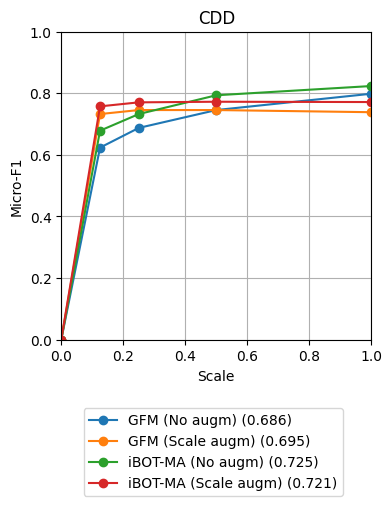

In [46]:
import matplotlib.pyplot as plt
from scipy.integrate import trapz

# Data points
x_values = [0, 1/8, 1/4, 1/2, 1]
y_values_gfm = [0, 0.623, 0.687, 0.745, 0.798]
y_values_gfm_aug = [0, 0.732, 0.745, 0.745, 0.738]
y_values_ibot = [0, 0.678, 0.732, 0.793, 0.823]
y_values_ibot_aug = [0, 0.757, 0.770, 0.772, 0.771]

# Sort together by x-values
sorted_data = sorted(zip(x_values, y_values))
x_values, y_values = zip(*sorted_data)

# Calculate AUC using trapezoidal rule
auc_gfm = trapz(y_values_gfm, x_values)
auc_gfm_aug = trapz(y_values_gfm_aug, x_values)
auc_ibot = trapz(y_values_ibot, x_values)
auc_ibot_aug = trapz(y_values_ibot_aug, x_values)

plt.figure(figsize=(4, 4))

# Plot the curve and points
plt.plot(x_values, y_values_gfm, label=f"GFM (No augm) ({auc_gfm:.3f})", marker='o')
plt.plot(x_values, y_values_gfm_aug, label=f"GFM (Scale augm) ({auc_gfm_aug:.3f})", marker='o')
plt.plot(x_values, y_values_ibot, label=f"iBOT-MA (No augm) ({auc_ibot:.3f})", marker='o')
plt.plot(x_values, y_values_ibot_aug, label=f"iBOT-MA (Scale augm) ({auc_ibot_aug:.3f})", marker='o')
# plt.scatter(x_values, y_values, label="Data Points")

# Add labels and title
plt.xlabel("Scale")
plt.ylabel("Micro-F1")
plt.title("CDD")

# Show AUC value
# plt.text(0.7, 0.1, f"AUC: {auc:.3f}", ha="center", va="center", color='C0')
# plt.text(0.2, 0.4, f"AUC: {auc_aug:.3f}", ha="center", va="center", color='C1')

plt.legend(bbox_to_anchor=(0.05, -0.2), loc='upper left') 

# plt.legend(loc='outer')
plt.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()



/tmp/ipykernel_2881395/1664316231.py:17: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  auc_gfm = trapz(y_values_gfm, x_values)
/tmp/ipykernel_2881395/1664316231.py:18: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  auc_gfm_aug = trapz(y_values_gfm_aug, x_values)
/tmp/ipykernel_2881395/1664316231.py:19: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  auc_ibot = trapz(y_values_ibot, x_values)
/tmp/ipykernel_2881395/1664316231.py:20: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  auc_ibot_aug = trapz(y_values_ibot_aug, x_values)


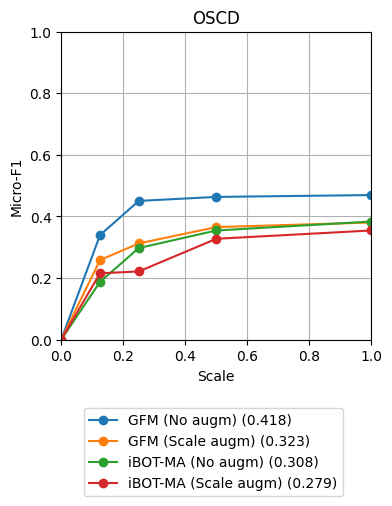

In [48]:
import matplotlib.pyplot as plt
from scipy.integrate import trapz

# Data points
x_values = [0, 1/8, 1/4, 1/2, 1]

y_values_gfm = [0,0.339,0.450,0.463,0.469]
y_values_gfm_aug = [0, 0.258,0.312,0.365,0.380 ]
y_values_ibot = [0,0.187,0.297,0.354,0.383 ]
y_values_ibot_aug = [0,0.215,0.221,0.327,0.354 ]

# Sort together by x-values
sorted_data = sorted(zip(x_values, y_values))
x_values, y_values = zip(*sorted_data)

# Calculate AUC using trapezoidal rule
auc_gfm = trapz(y_values_gfm, x_values)
auc_gfm_aug = trapz(y_values_gfm_aug, x_values)
auc_ibot = trapz(y_values_ibot, x_values)
auc_ibot_aug = trapz(y_values_ibot_aug, x_values)

plt.figure(figsize=(4, 4))

# Plot the curve and points
plt.plot(x_values, y_values_gfm, label=f"GFM (No augm) ({auc_gfm:.3f})", marker='o')
plt.plot(x_values, y_values_gfm_aug, label=f"GFM (Scale augm) ({auc_gfm_aug:.3f})", marker='o')
plt.plot(x_values, y_values_ibot, label=f"iBOT-MA (No augm) ({auc_ibot:.3f})", marker='o')
plt.plot(x_values, y_values_ibot_aug, label=f"iBOT-MA (Scale augm) ({auc_ibot_aug:.3f})", marker='o')
# plt.scatter(x_values, y_values, label="Data Points")

# Add labels and title
plt.xlabel("Scale")
plt.ylabel("Micro-F1")
plt.title("OSCD")

# Show AUC value
# plt.text(0.7, 0.1, f"AUC: {auc:.3f}", ha="center", va="center", color='C0')
# plt.text(0.2, 0.4, f"AUC: {auc_aug:.3f}", ha="center", va="center", color='C1')

plt.legend(bbox_to_anchor=(0.05, -0.2), loc='upper left') 

# plt.legend(loc='outer')
plt.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()



In [20]:
import numpy as np

# Simulating huge data
y_true = np.random.randint(0, 2, size=(768000, 256)) 
y_pred = np.random.randint(0, 2, size=(768000, 256))  

def f1_bitwise(y_true, y_pred):
    TP = np.bitwise_and(y_true, y_pred).sum()
    FP = np.bitwise_and(y_pred, np.logical_not(y_true)).sum()
    FN = np.bitwise_and(np.logical_not(y_pred), y_true).sum()

    precision = TP / (TP + FP + 1e-10)
    recall = TP / (TP + FN + 1e-10)
    F1 = 2 * (precision * recall) / (precision + recall + 1e-10)
    return F1

In [21]:
f1_score = f1_bitwise(y_true, y_pred)
print(f"F1 Score: {f1_score}")

F1 Score: 0.5000431190419309


In [18]:
y_true.shape

(196608000,)

In [ ]:
y_true & y_pred

In [ ]:
%time f1 = f1_score(y_true, y_pred)  # Or any other suitable average
print(f"F1 Score: {f1}")